# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot # to check normality
from statsmodels.stats.anova import anova_lm # to identify whether the model is significant or not
from statsmodels.formula.api import ols # to build regression model
from statsmodels.tools.eval_measures import rmse 

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# 2. Collect and load data

In [2]:
data = pd.read_csv('bigcity.csv')
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [3]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

# 3. Explore numeric variables - five number summary

In [4]:
data.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

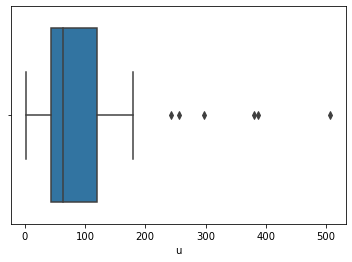

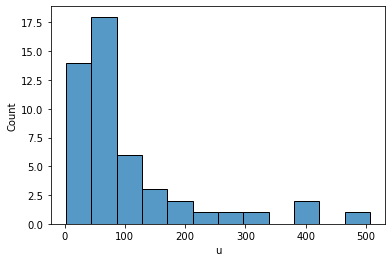

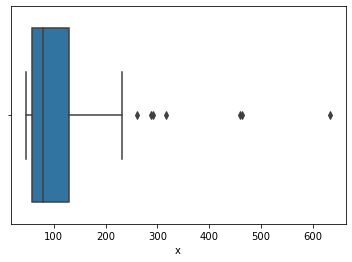

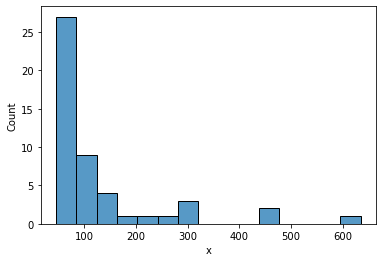

In [5]:
for i in data:
    sns.boxplot(data[i])
    plt.show()
    sns.histplot(data[i])
    plt.show()

In [7]:
for i in data:
    print(i)
    print('Variance : ', data[i].var())
    print('Standard deviation : ', data[i].std())
    print()

u
Variance :  10900.416666666662
Standard deviation :  104.40506054146351

x
Variance :  15158.832482993197
Standard deviation :  123.12121053252034



# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

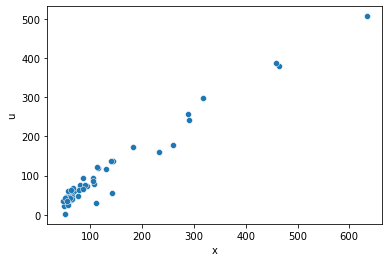

In [8]:
sns.scatterplot(data['x'], data['u'])
plt.show()
# upward trend found b/w x & u

In [9]:
pd.crosstab(data['x'], data['u'])

u,2,23,25,29,30,36,37,38,40,43,44,45,46,48,50,56,60,61,64,66,67,71,74,76,77,78,87,93,94,116,120,121,136,138,161,172,179,243,256,298,381,387,507
x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
46,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [10]:
data.shape
# 49 rows

(49, 2)

In [11]:
X = data['u']
X.head()
# input variable

0    138
1     93
2     61
3    179
4     48
Name: u, dtype: int64

In [12]:
Y = data['x']
Y.head()
# target variable

0    143
1    104
2     69
3    260
4     75
Name: x, dtype: int64

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [13]:
data.isna().sum()
# no missing values

u    0
x    0
dtype: int64

In [14]:
data.corr()
# correlation matrix

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


In [ ]:
#The high correlation betwwen u and x indicates that variable u is a good predictor of variable x

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print('x_train : ',x_train.shape)
print('x_test : ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

x_train :  (39,)
x_test :  (10,)
y_train :  (39,)
y_test :  (10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [16]:
linreg = LinearRegression()
x_train = sm.add_constant(x_train)
slr_model = linreg.fit(x_train, y_train)

slr_model.coef_

array([0.        , 1.15945123])

In [17]:
slr_model.intercept_

9.718455322828262

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

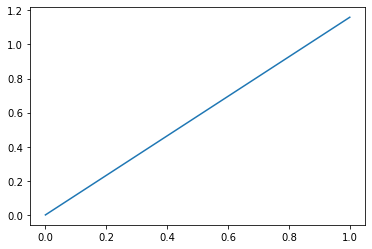

In [18]:
plt.plot(slr_model.coef_)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [19]:
# rmse
x_test = sm.add_constant(x_test)
y_test_pred = slr_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_test_pred))

23.385235190249123

In [20]:
# r2
r2_score(y_test, y_test_pred)

0.9181922560396981

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [21]:
slr_model.score(x_train, y_train)

0.9682175540860046

In [22]:
slr_model.score(x_test, y_test)

0.9181922560396981